# Zindi Competion on Financial Inclusion in Africa

### The objective include the following:
    * Load the data set
    * Exploratory Data Analysis
    * Preprocessing and Wrangling
    * Model creation
    * Result communication

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the Dataset

In [2]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
df_variables = pd.read_csv("./data/VariableDefinitions.csv")
df_sample_sub = pd.read_csv("./data/SampleSubmission.csv")

In [3]:
# Inspect the Datasets
print("Train dataset: ",df_train.shape)
print("Train dataset: ",df_test.shape)

Train dataset:  (23524, 13)
Train dataset:  (10086, 12)


What the above shows us is that there are 13 features or columns and 23524 rows in the train data set while in the test dataset there are 12 columns and 10086 rows. This means 12 features in the train dataset are independent and 1 is dependent.

In [4]:
# Observe the top five rows of the dataset
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Display additional information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


This shows the datatype of all the features in the train dataset. It also shows that we do not have any null values in the dataset.

In [6]:
# Check for missing values
print("Missing values: ", df_train.isnull().sum())

Missing values:  country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


This confirms that we don't have null values in the dataset

## 2. Exploratory Data Analysis

Explore the dataset to uncover relevant insights

### a. Univariate Analysis

In [7]:
# Get more insight on the target distribution
bank_account = df_train["bank_account"].value_counts()
print(bank_account)

bank_account
No     20212
Yes     3312
Name: count, dtype: int64


In [8]:
# Bank account owners percentage
bank_account_percentage = (bank_account / len(df_train)) * 100
print(bank_account_percentage)

bank_account
No     85.920762
Yes    14.079238
Name: count, dtype: float64


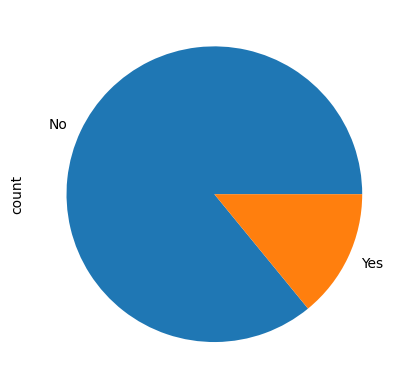

In [9]:
df_train["bank_account"].value_counts().plot(kind='pie')
plt.show()

It is clear that majority of the people do not have a bank account as high as 85%.

In [10]:
# Lets explore the location type
location_type = df_train["location_type"].value_counts()
location_type_percentage = (location_type / len(df_train)) * 100

print(location_type_percentage)

location_type
Rural    60.971774
Urban    39.028226
Name: count, dtype: float64


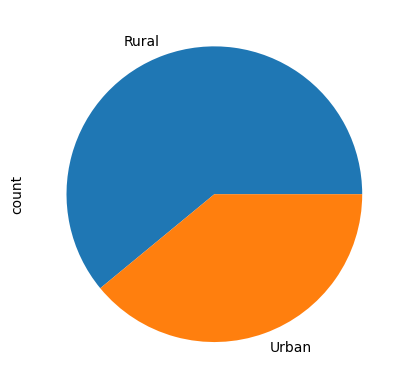

In [11]:
location_type.plot(kind='pie')
plt.show()

This shows the majority of the respondents are from the rural area taking up 60% while those in the urban area are 40%.

In [12]:
# Gender distribution
gender = df_train['gender_of_respondent'].value_counts()
gender_percentage = (gender / len(df_train)) * 100
print(gender_percentage)

gender_of_respondent
Female    58.990818
Male      41.009182
Name: count, dtype: float64


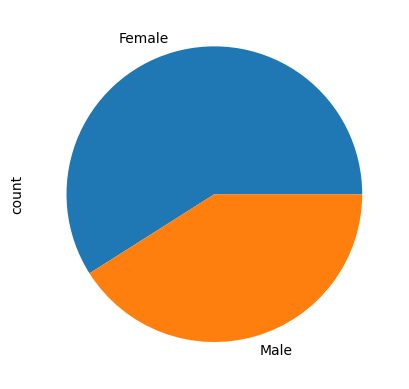

In [13]:
gender.plot(kind="pie")
plt.show()

So almost 60% of the respondents are female while about 40 are male. This means that more women were interviewed than men.

In [14]:
# Countries are represented in the data set
for c in df_train["country"].unique():
    print(c)

Kenya
Rwanda
Tanzania
Uganda


In [15]:
# Number of people per country
people_per_country = df_train["country"].value_counts()
percent_of_people_per_country = (people_per_country / len(df_train)) * 100
print(people_per_country)
print(percent_of_people_per_country)

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64
country
Rwanda      37.132290
Tanzania    28.141473
Kenya       25.794933
Uganda       8.931304
Name: count, dtype: float64


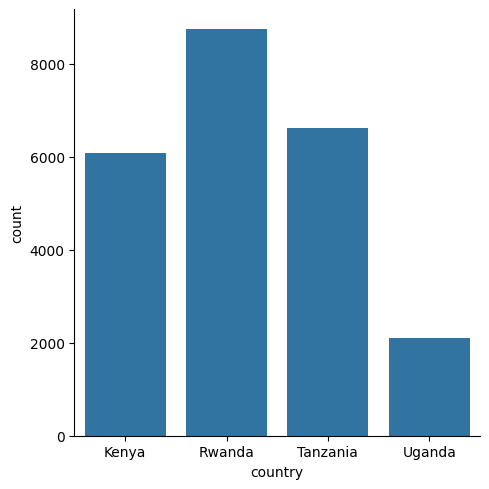

In [16]:
sns.catplot(x="country", kind='count', data = df_train);


So there are four countries represented. Lets visualize how they are represented. Majority of the people, consituting 37% are from Rwanda while the least represented are Uganda with just about 9%. Tanzania and Kenya are closely tied with 28% and 25% apiece.

In [17]:
# Lets explore more on cellphone access
cellphone_access = df_train["cellphone_access"].value_counts()
cellphone_access_percentage = (cellphone_access / len(df_train)) * 100
print(cellphone_access_percentage)

cellphone_access
Yes    74.196565
No     25.803435
Name: count, dtype: float64


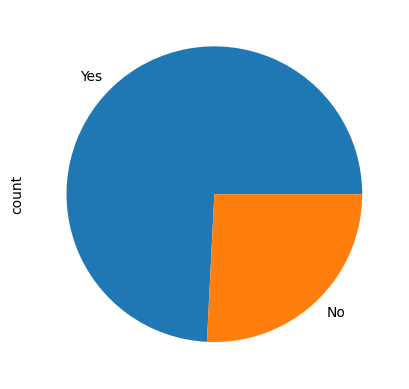

In [18]:
cellphone_access.plot(kind='pie')
plt.show()

We can see that majority of the respondents have access to cellphones. Only about a quarter do not.

In [19]:
# Insight on the household size
df_train['household_size'].describe()

count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

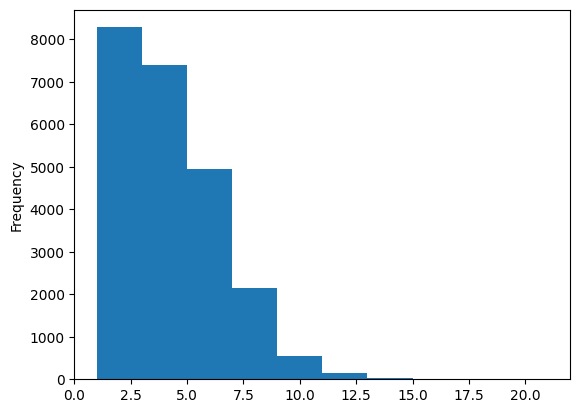

In [20]:
df_train["household_size"].plot(kind='hist')
plt.show()

This shows us the size of each household that was interviewed. The household with the least size has 1 person while 21 is the highest household size. The mean household size is approximately 4 while the standard deviation is around 2. Household size is not normally distributed but the common number of people in household family is 2.

In [21]:
# Insight on respondent's age
df_train["age_of_respondent"].describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

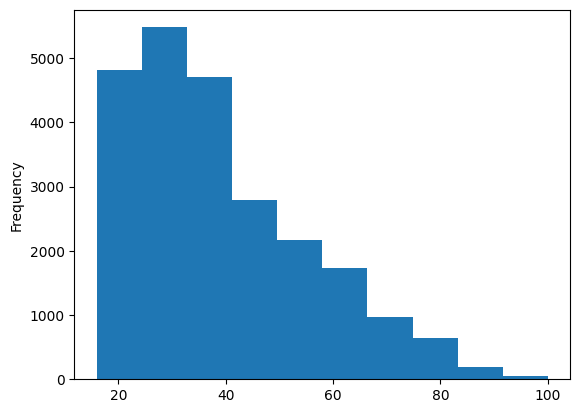

In [22]:
df_train["age_of_respondent"].plot(kind="hist");

Most of respondents are between the age bracket of 25 and 35

In [23]:
# Insights on relationship with the head of the household
df_train["relationship_with_head"].value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

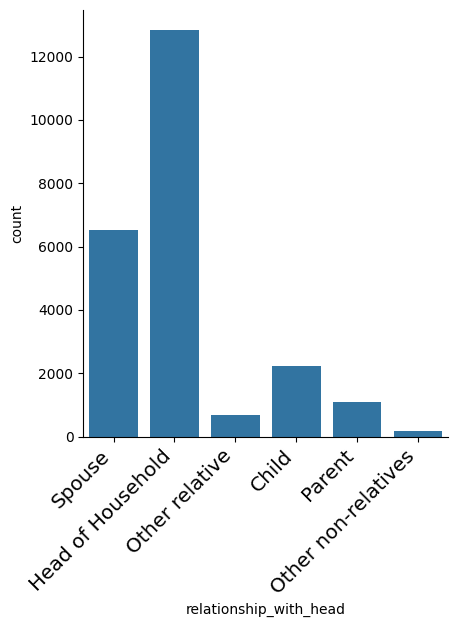

In [24]:
sns.catplot(x="relationship_with_head", kind="count", data = df_train);
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

Heads of households are almost twice as much as spouses. There are other few relatives and non relatives.

In [25]:
# Insights on education level
df_train["education_level"].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

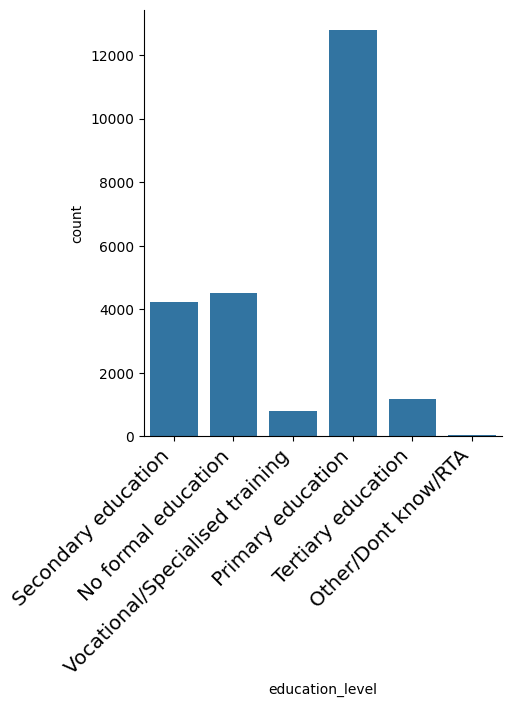

In [26]:
sns.catplot(x="education_level", kind="count", data=df_train); 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

In [27]:
# Insights on job type
df_train["job_type"].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

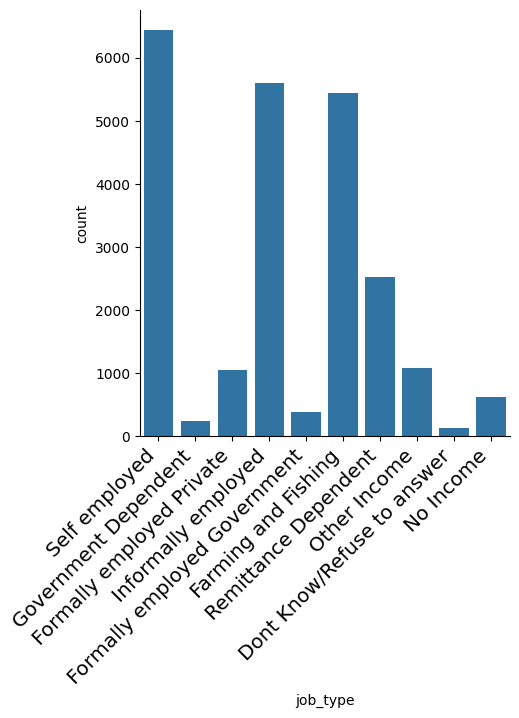

In [28]:
sns.catplot(x = "job_type", kind = "count", data = df_train);
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

Most of the respondents are self employed.

In [29]:
# Insights on marital status
df_train["marital_status"].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

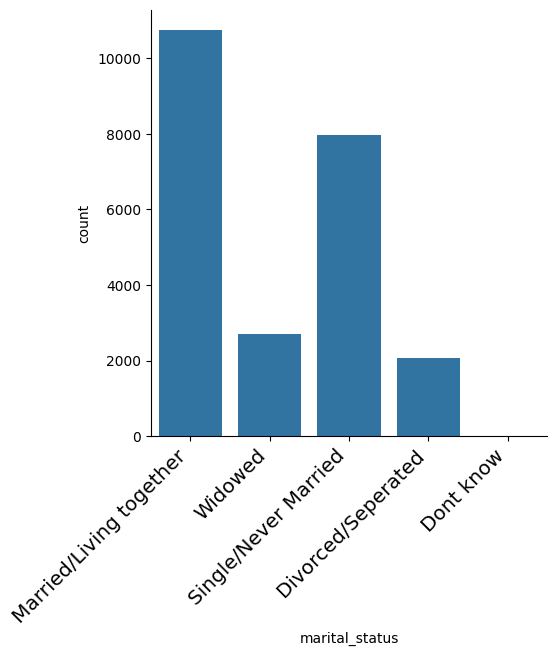

In [30]:
sns.catplot(x = "marital_status", kind = "count", data = df_train);
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

Most of the respondents are married and living together but the singles also have a significant number.

### b. Bivariate Analysis

Under the bivariate analysis, we want to observe the relationship between other features and the target vector which is bank account.

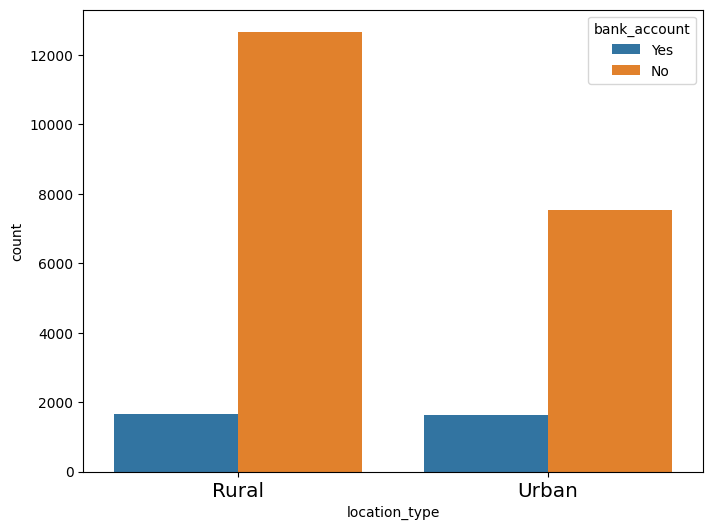

In [31]:
# Bank Account vs Location Type
plt.figure(figsize = (8, 6))
sns.countplot(x = "location_type", hue = "bank_account", data = df_train);
plt.xticks(
    fontweight = 'light',
    fontsize = 'x-large'
);

This shows that there are more people in the rural area who do not have bank account.

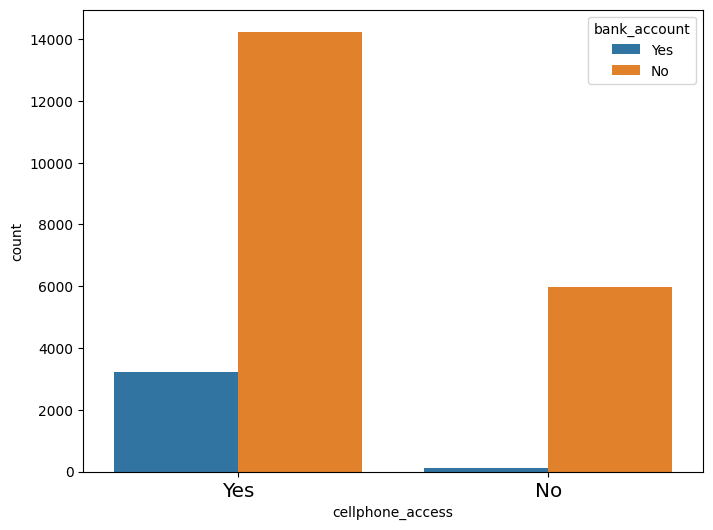

In [32]:
# Bank account vs Cellphone Access
plt.figure(figsize = (8, 6))
sns.countplot(x = "cellphone_access", hue = "bank_account", data = df_train);
plt.xticks(
    fontweight = "light",
    fontsize = "x-large"
);

This shows that although there are more people with bank accounts who have cellphones than those without cellphones, there is an overwhelming majority of people who do not have bank accounts but they have cellphones. This may be due to availability of mobile money applications that is available for cellphone users.

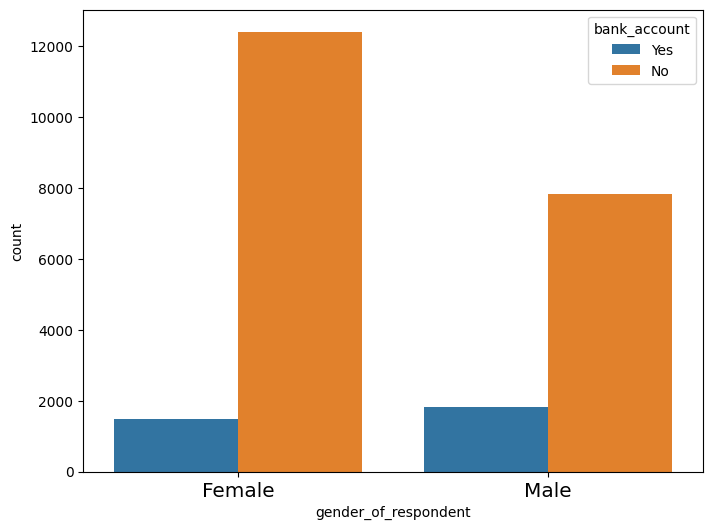

In [33]:
# Bank account vs Gender of Respondent
plt.figure(figsize = (8, 6))
sns.countplot(x = "gender_of_respondent", hue = "bank_account", data = df_train);
plt.xticks(
    fontweight = "light",
    fontsize = "x-large"
);

This shows that most females do not have bank accounts. 

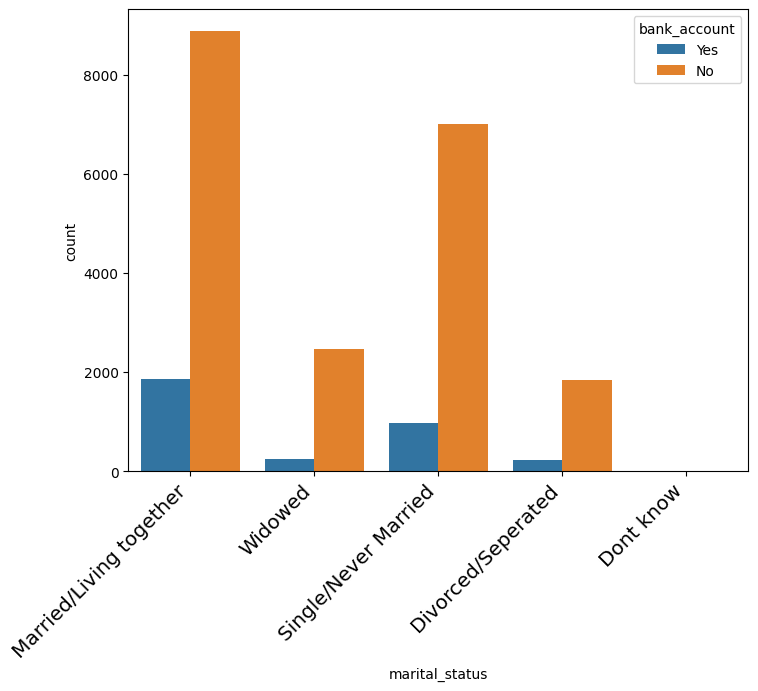

In [34]:
# Bank account vs Marital Status
plt.figure(figsize = (8, 6))
sns.countplot(x = "marital_status", hue = "bank_account", data = df_train);
plt.xticks(
    rotation = 45,
    fontweight = "light",
    fontsize = "x-large",
    horizontalalignment = "right"
);

Most of those who do not have bank account number are those who are married and living together.

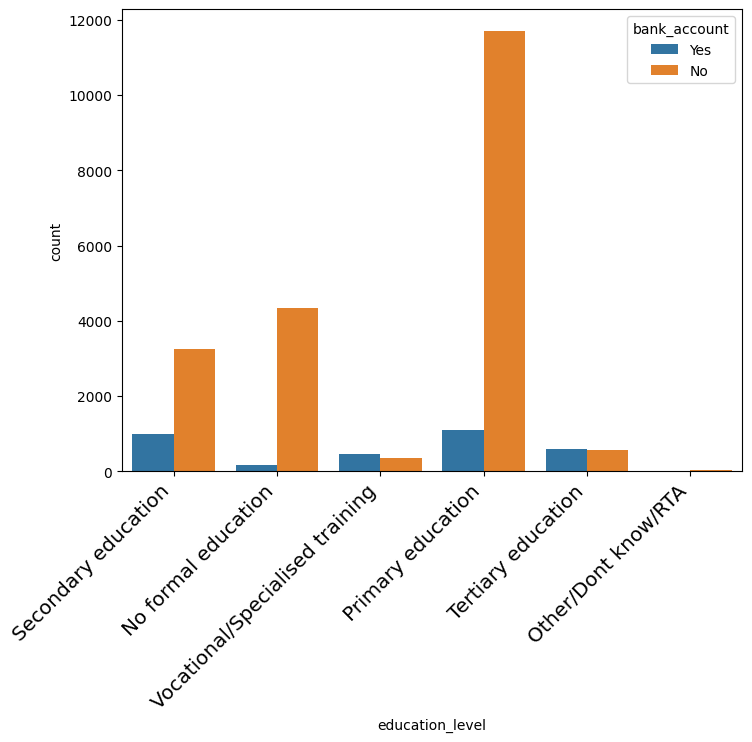

In [35]:
# Bank account vs Education Level
plt.figure(figsize = (8, 6))
sns.countplot(x = "education_level", hue = "bank_account", data = df_train);
plt.xticks(
    rotation = 45,
    fontweight = "light",
    fontsize = "x-large",
    horizontalalignment = "right"
);

Those with lower level of education are those who do not have bank accounts. As we can see those with only primary education are the highest without bank accounts.

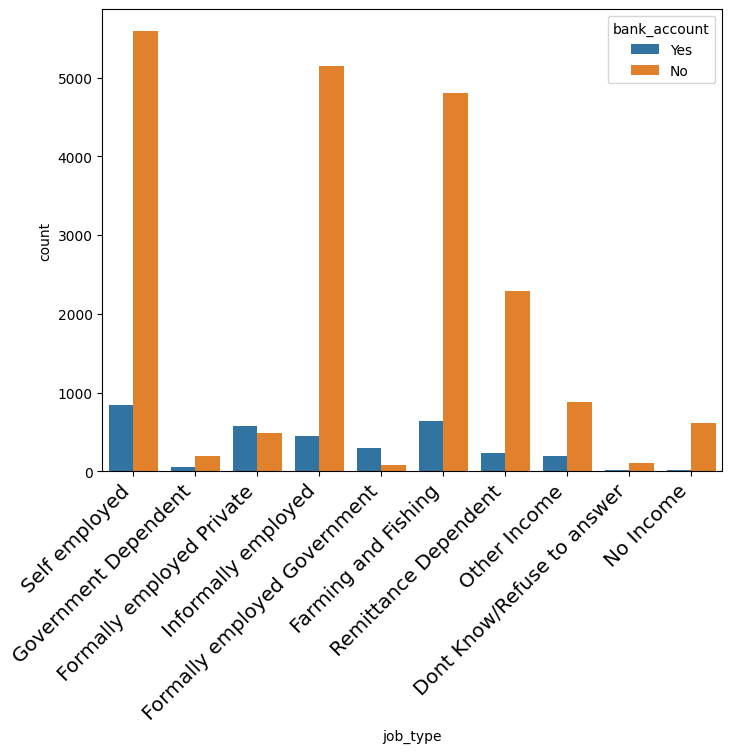

In [36]:
# Bank account vs Job Type
# Bank account vs Education Level
plt.figure(figsize = (8, 6))
sns.countplot(x = "job_type", hue = "bank_account", data = df_train);
plt.xticks(
    rotation = 45,
    fontweight = "light",
    fontsize = "x-large",
    horizontalalignment = "right"
);

As visibly displayed, the highest without bank account are the self employed. Next is the informally employed and the third are those engaged in farming and fishing.

## 3. Data Preprocessing

In [37]:
# Prepare the data for modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Convert target vector to numerical data
le = LabelEncoder()
df_train['bank_account'] = le.fit_transform(df_train["bank_account"])

# Separate training features from target vecture
X_train = df_train.drop(["bank_account"], axis=1) # Feature matrix
y_train = df_train['bank_account'] # Target vector

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [38]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniqueid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

In [39]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(df_test)

In [40]:
# the first train row
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


In [41]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


## 4. Model Building

Split the train for evaluation

In [42]:
import sklearn.model_selection

In [43]:
# Split train data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(processed_train, y_train, stratify= y_train,
                                test_size = 0.1, random_state = 42)

In [44]:
# Import classifier algorithm here
from xgboost import XGBClassifier # xgboost is a type of model

# Create model
xg_model = XGBClassifier()

# Fit the model
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Evaluation

In [45]:
# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# Evaluate model
xg_y_model = xg_model.predict(X_val)

# Get error rate
print("Error rate for XGB Classifier: ", 1 - accuracy_score(y_val, xg_y_model))



Error rate for XGB Classifier:  0.11177220569485757


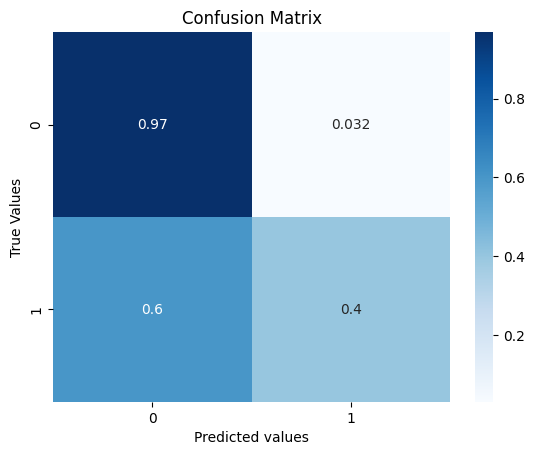

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_val, xg_y_model, normalize="true")

# Visualize confusion matrix 
sns.heatmap(cm,annot=True, cmap="Blues")
plt.xlabel("Predicted values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")
plt.show()


In [67]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_train, y_train)
print(my_xgb_model.best_params_)        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 1, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.8}


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.11092222694432641


The XGB model has improved from **0.1117** to **0.1109**

### 5. Making Submission

In [71]:
# Using our model to make prediction on test data
df_test.bank_account = xgb_model.predict(processed_test)

In [72]:
# Create a submission dataframe
submission = pd.DataFrame({"uniqueid": df_test["uniqueid"] + "x" + df_test["country"],
                            "bank_account": df_test.bank_account})

In [74]:
submission.sample(5)

,uniqueid,bank_account
2517,uniqueid_8586xKenya,0
1424,uniqueid_7493xKenya,1
6001,uniqueid_12136xRwanda,0
294,uniqueid_6363xKenya,0
6768,uniqueid_7043xTanzania,0


In [75]:
# Convert submission dataframe to csv
submission.to_csv("submission.csv", index=False)